# Neural Network Homework

Coded by: **Jorge Polanco**

In [507]:
#pip install Keras
#pip install Tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.datasets import reuters
import pyspark.sql.functions as f
import matplotlib.pyplot as plt
from sklearn import metrics
from keras import models
from keras import layers
import tensorflow as tf
import pandas as pd
import numpy as np
import random

In [512]:
# Stablishing the directory from we will get our inputs
directory = "C:/Users/jpolancoroque/Desktop/IESEG/02. Second Semester/Statistical & Machine Learning Approaches for Marketing/SML_Section7_v2.1/data/com1_default"

In [513]:
# Import the database
db = pd.read_csv(directory + '/default.csv', sep=";")

In [514]:
db = db.reset_index(drop=True, inplace=False)

In [515]:
db.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [516]:
y = db.iloc[:,-1]
y = pd.DataFrame(y)
y.head()

,Y
0,1
1,1
2,0
3,0
4,0


In [517]:
y = y.astype('object')

In [518]:
db = db.iloc[:,1:-1]
db.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


**Q1**

In [519]:
# Load the dataset
random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(db, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24000, 23) (24000, 1)
(6000, 23) (6000, 1)


In [520]:
# Standarizing
X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)

# Leaving with changes for the classification models
X_train2 = X_train
X_test2 = X_test
y_train2 = y_train
y_test2 = y_test

In [521]:
# Vectorize labels
#X_train = np.asarray(X_train).astype('float32')
#X_test = np.asarray(X_test).astype('float32')
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#y_train = np.asarray(y_train)
#y_test = np.asarray(y_test)

In [522]:
# Create a validation set
x_val = X_train[:5000]
partial_X_train = X_train[5000:]

y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [523]:
print(x_val.shape, y_val.shape)
print(partial_X_train.shape, partial_y_train.shape)

(5000, 23) (5000, 2)
(19000, 23) (19000, 2)


**Q2**

In [524]:
# Simple DNN: input data = vectors, labels = scalars
model = models.Sequential()

In [525]:
# Define the layers
model.add(layers.Dense(30, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))

In [526]:
model.compile(optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['acc'])

In [527]:
# Fit the model
#history = model.fit(partial_X_train, partial_y_train, validation_data=(x_val, y_val))

In [528]:
# Fit the model
history = model.fit(partial_X_train,
  partial_y_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

Train on 19000 samples, validate on 5000 samples
Epoch 1/20
19000/19000 [==============================] - 1s 29us/step - loss: 0.5809 - acc: 0.7777 - val_loss: 0.5259 - val_acc: 0.7780
Epoch 2/20
19000/19000 [==============================] - 0s 9us/step - loss: 0.5039 - acc: 0.7822 - val_loss: 0.4914 - val_acc: 0.7786
Epoch 3/20
19000/19000 [==============================] - 0s 9us/step - loss: 0.4844 - acc: 0.7888 - val_loss: 0.4814 - val_acc: 0.7880
Epoch 4/20
19000/19000 [==============================] - 0s 7us/step - loss: 0.4763 - acc: 0.7963 - val_loss: 0.4756 - val_acc: 0.7958
Epoch 5/20
19000/19000 [==============================] - 0s 8us/step - loss: 0.4704 - acc: 0.8004 - val_loss: 0.4709 - val_acc: 0.7964
Epoch 6/20
19000/19000 [==============================] - 0s 7us/step - loss: 0.4656 - acc: 0.8024 - val_loss: 0.4674 - val_acc: 0.7994
Epoch 7/20
19000/19000 [==============================] - 0s 6us/step - loss: 0.4618 - acc: 0.8049 - val_loss: 0.4649 - val_acc: 0.802

In [529]:
# Have a look at the training history
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [530]:
# Get accuracy on validation set
acc = history_dict.get("acc")
val_acc = history_dict.get("val_acc")
print(val_acc)

[0.777999997138977, 0.7785999774932861, 0.7879999876022339, 0.795799970626831, 0.7964000105857849, 0.7993999719619751, 0.8019999861717224, 0.8041999936103821, 0.8055999875068665, 0.8090000152587891, 0.8083999752998352, 0.8091999888420105, 0.8100000023841858, 0.8095999956130981, 0.8104000091552734, 0.8083999752998352, 0.8076000213623047, 0.8109999895095825, 0.8108000159263611, 0.8073999881744385]


In [531]:
# Create values
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

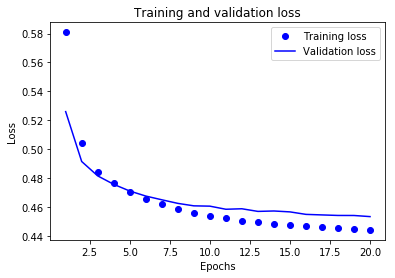

In [532]:
# Create plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

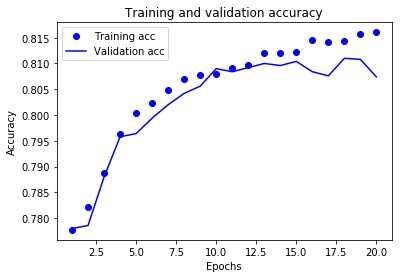

In [533]:
# Create values
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

# Create plot
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [534]:
model.compile(optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['acc'])

model.fit(X_train, y_train, epochs=5, batch_size=512)

results_epoch = model.evaluate(X_test, y_test)

Epoch 1/5
24000/24000 [==============================] - 0s 16us/step - loss: 0.5568 - acc: 0.7771
Epoch 2/5
24000/24000 [==============================] - 0s 9us/step - loss: 0.4992 - acc: 0.7959
Epoch 3/5
24000/24000 [==============================] - 0s 8us/step - loss: 0.4753 - acc: 0.8020
Epoch 4/5
24000/24000 [==============================] - 0s 9us/step - loss: 0.4657 - acc: 0.8071
Epoch 5/5
6000/6000 [==============================] - 0s 58us/step


**Q3**

In [535]:
# Simple DNN: input data = vectors, labels = scalars
model2 = models.Sequential()

In [536]:
# Define the layers
model2.add(layers.Dense(30, activation='sigmoid'))
model2.add(layers.Dense(30, activation='sigmoid'))
model2.add(layers.Dense(30, activation='sigmoid'))
model2.add(layers.Dense(30, activation='sigmoid'))
model2.add(layers.Dense(30, activation='sigmoid'))
model2.add(layers.Dense(2, activation='sigmoid'))

In [537]:
model2.compile(optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['acc'])

In [538]:
# Fit the model
history2 = model2.fit(partial_X_train,
  partial_y_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

Train on 19000 samples, validate on 5000 samples
Epoch 1/20
19000/19000 [==============================] - 1s 29us/step - loss: 0.5844 - acc: 0.7454 - val_loss: 0.5337 - val_acc: 0.7750
Epoch 2/20
19000/19000 [==============================] - 0s 11us/step - loss: 0.5304 - acc: 0.7771 - val_loss: 0.5323 - val_acc: 0.7750
Epoch 3/20
19000/19000 [==============================] - 0s 11us/step - loss: 0.5291 - acc: 0.7771 - val_loss: 0.5312 - val_acc: 0.7750
Epoch 4/20
19000/19000 [==============================] - 0s 10us/step - loss: 0.5257 - acc: 0.7771 - val_loss: 0.5244 - val_acc: 0.7750
Epoch 5/20
19000/19000 [==============================] - 0s 10us/step - loss: 0.5165 - acc: 0.7771 - val_loss: 0.5129 - val_acc: 0.7750
Epoch 6/20
19000/19000 [==============================] - 0s 10us/step - loss: 0.4997 - acc: 0.7771 - val_loss: 0.4912 - val_acc: 0.7750
Epoch 7/20
19000/19000 [==============================] - 0s 10us/step - loss: 0.4804 - acc: 0.7801 - val_loss: 0.4765 - val_acc:

In [539]:
# Have a look at the training history
history_dict2 = history2.history
history_dict2.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [540]:
# Get accuracy on validation set
acc2 = history_dict2.get("acc")
val_acc2 = history_dict2.get("val_acc")
print(val_acc2)

[0.7749999761581421, 0.7749999761581421, 0.7749999761581421, 0.7749999761581421, 0.7749999761581421, 0.7749999761581421, 0.801800012588501, 0.8087999820709229, 0.8076000213623047, 0.8065999746322632, 0.807200014591217, 0.807200014591217, 0.8055999875068665, 0.8087999820709229, 0.8064000010490417, 0.8108000159263611, 0.8105999827384949, 0.8109999895095825, 0.8108000159263611, 0.8069999814033508]


In [541]:
# Create values
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
epochs2 = range(1, len(acc) + 1)

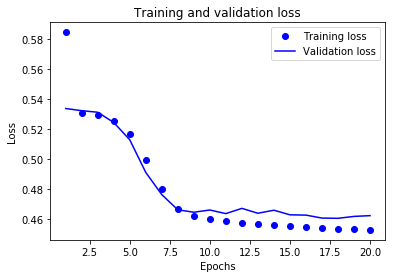

In [542]:
# Create plot
plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

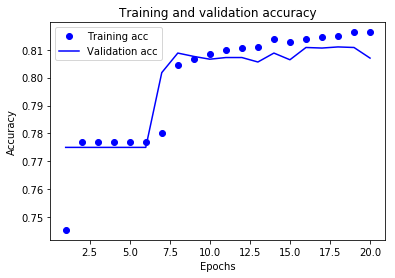

In [543]:
# Create values
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']
epochs2 = range(1, len(acc_values2) + 1)

# Create plot
plt.plot(epochs2, acc_values2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc_values2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [544]:
model.compile(optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['acc'])

model.fit(X_train, y_train, epochs=15, batch_size=512)

results_epoch = model.evaluate(X_test, y_test)

Epoch 1/15
24000/24000 [==============================] - 0s 11us/step - loss: 0.4613 - acc: 0.8093
Epoch 2/15
24000/24000 [==============================] - 0s 6us/step - loss: 0.4602 - acc: 0.8103
Epoch 3/15
24000/24000 [==============================] - 0s 7us/step - loss: 0.4594 - acc: 0.8095
Epoch 4/15
24000/24000 [==============================] - 0s 6us/step - loss: 0.4586 - acc: 0.8107
Epoch 5/15
24000/24000 [==============================] - 0s 7us/step - loss: 0.4579 - acc: 0.8093
Epoch 6/15
24000/24000 [==============================] - 0s 7us/step - loss: 0.4573 - acc: 0.8099
Epoch 7/15
24000/24000 [==============================] - 0s 5us/step - loss: 0.4565 - acc: 0.8101
Epoch 8/15
24000/24000 [==============================] - 0s 6us/step - loss: 0.4559 - acc: 0.8097
Epoch 9/15
24000/24000 [==============================] - 0s 7us/step - loss: 0.4553 - acc: 0.8109
Epoch 10/15
24000/24000 [==============================] - 0s 6us/step - loss: 0.4546 - acc: 0.8111
Epoch 11

**Q4**

***1) Decision Tree:***

In [570]:
from sklearn.tree import DecisionTreeClassifier

In [556]:
y_train2 = np.asarray(y_train2).astype('float32')
y_test2 = np.asarray(y_test2).astype('float32')

In [562]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

# Predict the response for test dataset
y_pred = clf.predict(X_test2)

In [563]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred))

Accuracy: 0.7118333333333333


***2) Logistic Regression:***

In [510]:
from sklearn.linear_model import LogisticRegression

In [564]:
# Create Logistic Regression classifer object
log_reg = LogisticRegression()

# Train Logistic Regression Classifer
log_reg = log_reg.fit(X_train2,y_train2)

# Predict the response for test dataset
y_pred = log_reg.predict(X_test2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [565]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred))

Accuracy: 0.8215


***3) KNN Model:***

In [566]:
from sklearn.neighbors import KNeighborsClassifier

In [567]:
# Create KNN classifer object
knn_c = KNeighborsClassifier()

# Train KNN Classifer
knn_c = knn_c.fit(X_train2,y_train2)

# Predict the response for test dataset
y_pred = knn_c.predict(X_test2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [568]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred))

Accuracy: 0.7966666666666666


***4) KNN Model:***

In [571]:
from sklearn.naive_bayes import GaussianNB

In [572]:
# Create GNV classifer object
gnv = GaussianNB()

# Train GNV Classifer
gnv = gnv.fit(X_train2,y_train2)

# Predict the response for test dataset
y_pred = gnv.predict(X_test2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [573]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred))

Accuracy: 0.7388333333333333


***5) SVC Model:***

In [575]:
from sklearn.svm import SVC

In [576]:
# Create SVC object
svc = SVC()

# Train SVC
svc = svc.fit(X_train2,y_train2)

# Predict the response for test dataset
y_pred = svc.predict(X_test2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [577]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred))

Accuracy: 0.8306666666666667


**Conclusions:** In general terms, we can say that Neural Network models tends to show a better and more stable performance than other models. However, this will always depend on the particular case one is dealing with. For instance, in this case it seems that SVC model presented a better performance (even with no CV processes). So, if I would have to choose between a SVC and a NN to present to a client, probably I would choose the easiest one to understand, which would be SVC model.